In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/skoltech-anomaly-benchmark-skab/SKAB/valve2/1.csv
/kaggle/input/skoltech-anomaly-benchmark-skab/SKAB/valve2/3.csv
/kaggle/input/skoltech-anomaly-benchmark-skab/SKAB/valve2/2.csv
/kaggle/input/skoltech-anomaly-benchmark-skab/SKAB/valve2/0.csv
/kaggle/input/skoltech-anomaly-benchmark-skab/SKAB/other/18.csv
/kaggle/input/skoltech-anomaly-benchmark-skab/SKAB/other/20.csv
/kaggle/input/skoltech-anomaly-benchmark-skab/SKAB/other/11.csv
/kaggle/input/skoltech-anomaly-benchmark-skab/SKAB/other/17.csv
/kaggle/input/skoltech-anomaly-benchmark-skab/SKAB/other/16.csv
/kaggle/input/skoltech-anomaly-benchmark-skab/SKAB/other/19.csv
/kaggle/input/skoltech-anomaly-benchmark-skab/SKAB/other/13.csv
/kaggle/input/skoltech-anomaly-benchmark-skab/SKAB/other/23.csv
/kaggle/input/skoltech-anomaly-benchmark-skab/SKAB/other/14.csv
/kaggle/input/skoltech-anomaly-benchmark-skab/SKAB/other/22.csv
/kaggle/input/skoltech-anomaly-benchmark-skab/SKAB/other/12.csv
/kaggle/input/skoltech-anomaly-benchmark

In [36]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
# from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping

from itertools import product
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline

In [37]:
raw_data = pd.read_csv('../input/skoltech-anomaly-benchmark-skab-teaser/SKAB teaser.csv', 
                   sep=';', 
                   index_col='datetime', 
                   parse_dates=True).drop('index',axis=1)

In [38]:
raw_data

,id,value
datetime,,
2019-07-08 17:02:14,Current,0.000749
2019-07-08 17:02:14,Temperature,28.209900
2019-07-08 17:02:14,Voltage,252.743000
2019-07-08 17:02:14,Accelerometer1RMS,0.042830
2019-07-08 17:02:14,Accelerometer2RMS,0.080612
...,...,...
2019-07-08 19:21:51,Accelerometer1RMS,0.035453
2019-07-08 19:21:51,Accelerometer2RMS,0.060877
2019-07-08 19:21:51,Volume Flow RateRMS,36.033400


In [39]:
raw_data = raw_data.pivot_table(values='value', index=raw_data.index, columns='id')
raw_data

id,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS
datetime,,,,,,,,
2019-07-08 17:02:14,0.042830,0.080612,0.000749,-0.273216,28.2099,23.4457,252.743,37.0242
2019-07-08 17:02:32,0.043330,0.084116,0.000849,0.054711,28.3486,23.4492,240.488,37.0000
2019-07-08 17:02:45,0.044111,0.082577,0.000764,0.054711,28.6534,23.4417,235.642,37.9764
2019-07-08 17:02:46,0.044244,0.079906,0.000914,-0.273216,28.8157,23.4417,229.536,37.0242
2019-07-08 17:02:47,0.042298,0.081938,0.000768,0.054711,28.3558,23.4362,239.926,37.9764
...,...,...,...,...,...,...,...,...
2019-07-08 19:21:47,0.036152,0.063038,0.000471,-0.273216,46.0023,24.3395,220.734,36.0000
2019-07-08 19:21:48,0.035053,0.063914,0.000758,0.054711,46.3134,24.3407,207.956,36.0334
2019-07-08 19:21:49,0.035560,0.064118,0.000949,0.054711,46.3939,24.3303,234.686,36.9675


In [40]:
raw_data.shape

(6405, 8)

In [42]:
# Обрезка данных
raw_data = raw_data['2019-07-08 17:52:29':]

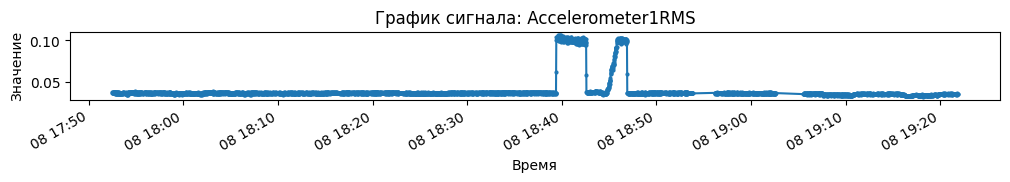

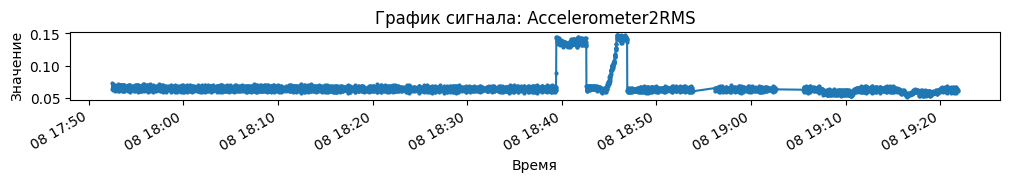

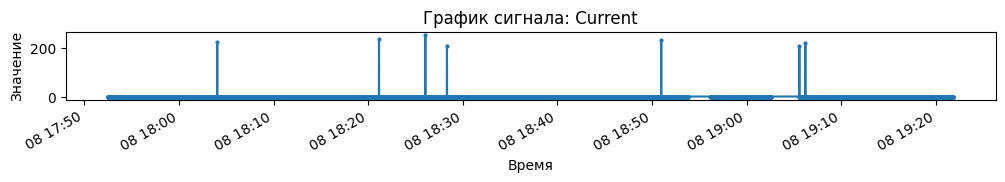

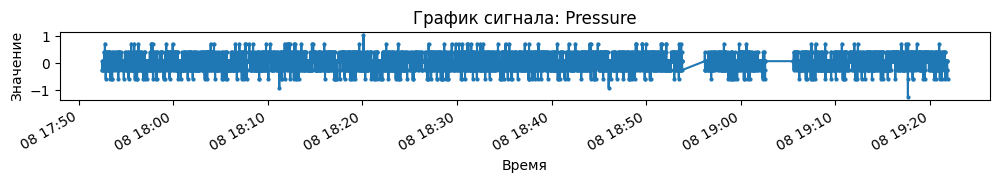

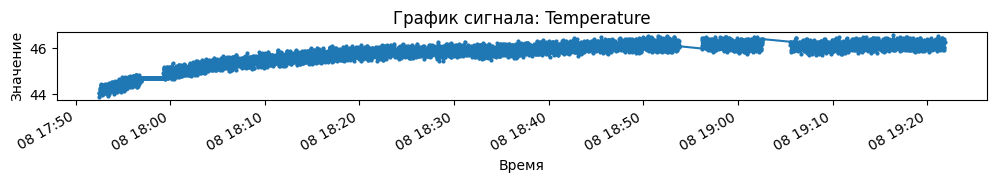

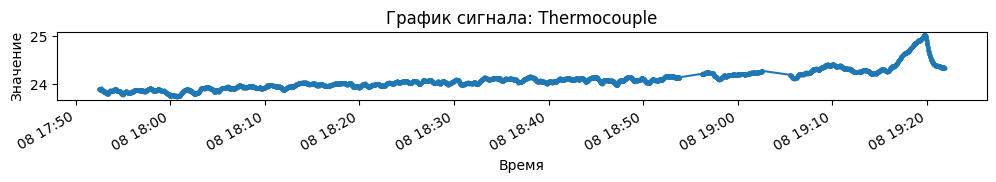

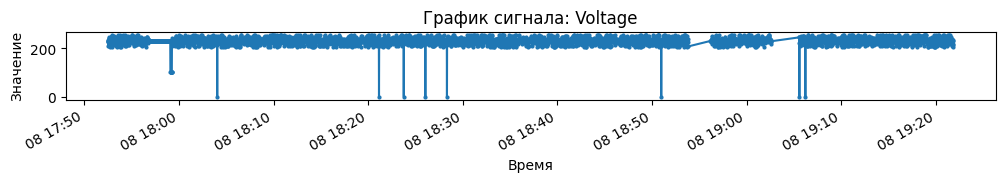

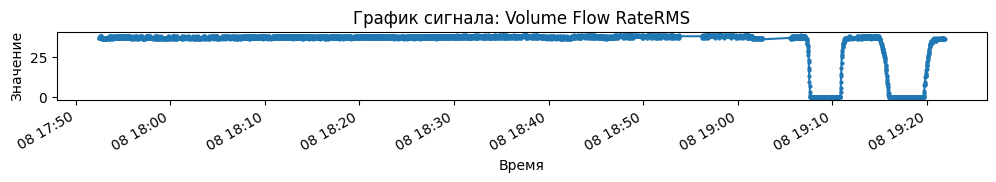

In [9]:
for name in raw_data.columns:
    raw_data[name].plot(figsize=(12,1), marker='o', markersize=2)
    plt.xlabel('Время')
    plt.ylabel('Значение')
    plt.title(f'График сигнала: {name}')
    plt.show()

In [10]:
data = raw_data

# **Делим на выборки**


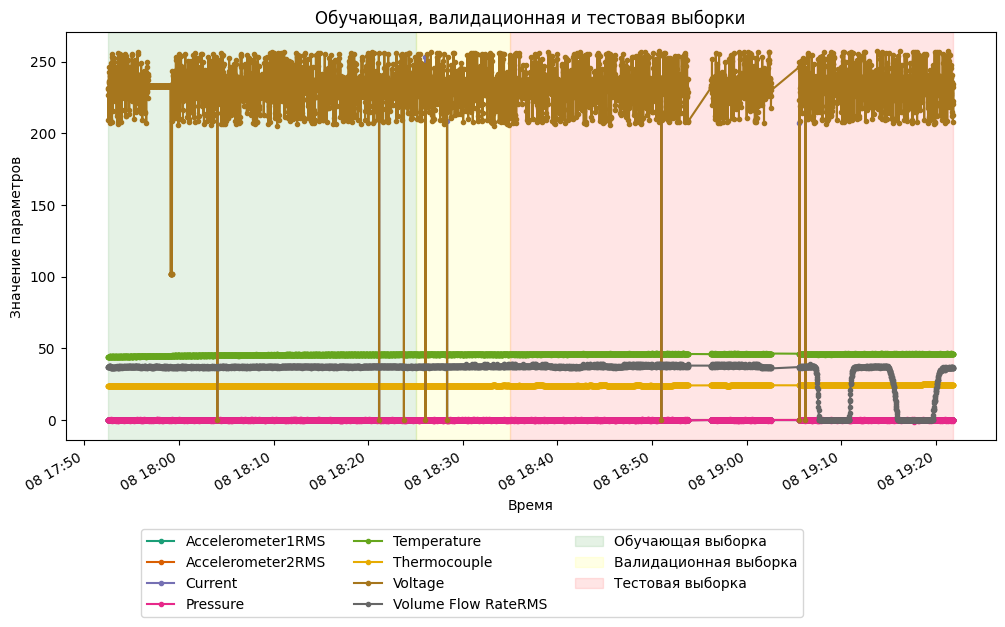

In [11]:
data.plot(figsize=(12,6), marker='o', markersize=3, cmap='Dark2')

plt.axvspan(data.index[0], 
            '2019-07-08 18:25', 
            color='green', 
            alpha=0.1, 
            label='Обучающая выборка')

plt.axvspan('2019-07-08 18:25', 
            '2019-07-08 18:35', 
            color='yellow', 
            alpha=0.1, 
            label='Валидационная выборка')

plt.axvspan('2019-07-08 18:35', 
            data.index[-1], 
            color='red', 
            alpha=0.1, 
            label='Тестовая выборка')

plt.legend(bbox_to_anchor =(0.8, -0.2), ncol = 3)
plt.xlabel('Время')
plt.ylabel('Значение параметров')
plt.title('Обучающая, валидационная и тестовая выборки');

In [12]:
# Инициализация скэйлера

StSc = StandardScaler()
# Обучение скэйлера на тренировочной выборке
StSc.fit(data[:'2019-07-08 18:25'])

# Применение скэйлера на всех данных

# Преобразование тренировочной выборки
train_sc = StSc.transform(data[:'2019-07-08 18:25'])
# Преобразование валидационной выборки
val_sc = StSc.transform(data['2019-07-08 18:25':'2019-07-08 18:35'])
# Преобразование всей выборки
data_sc = StSc.transform(data)

In [13]:
def Random(seed_value):
    # 1. Set `PYTHONHASHSEED` environment variable at a fixed value
    import os
    os.environ['PYTHONHASHSEED'] = str(seed_value)

    # 2. Set `python` built-in pseudo-random generator at a fixed value
    import random
    random.seed(seed_value)

    # 3. Set `numpy` pseudo-random generator at a fixed value
    import numpy as np
    np.random.seed(seed_value)

    # 4. Set `tensorflow` pseudo-random generator at a fixed value
    import tensorflow as tf
    tf.random.set_seed(seed_value)

In [14]:
# Функция для обучения конкретной архитектуры модели
def arch(param, data):
    """
    Обучение конкретной архитектуры

    Parameters
    ----------
    param : list
    
    data : np.array
    """
    Random(0)
    input_dots = Input((8,))

    x = Dense(param[0])(input_dots)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Dense(param[1])(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    bottleneck = Dense(param[2], activation='linear')(x)

    x = Dense(param[1])(bottleneck)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Dense(param[0])(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    out = Dense(8, activation='linear')(x)

    model = Model(input_dots, out)
    model.compile(optimizer=Adam(param[3]), loss='mae', metrics=["mse"])
    
#     early_stopping = EarlyStopping(patience=3, verbose=0)
    model.fit(data, data,
                validation_split=0.2,
                epochs=10,
                batch_size=param[4],
                verbose=0,
                shuffle=True,
#                 callbacks=[early_stopping]
               )
    
    return model

In [15]:
from tqdm.notebook import tqdm

In [16]:


model = arch((6, 3, 2, 0.01, 32), train_sc) # train+val стоит использовать, если распределения выборок совпадают
model.summary()


I0000 00:00:1716468588.633953     108 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 6)              │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6)              │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │            56 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 662 (2.59 KB)

 Trainable params: 208 (832.00 B)

 Non-trainable params: 36 (144.00 B)

 Optimizer params: 418 (1.64 KB)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


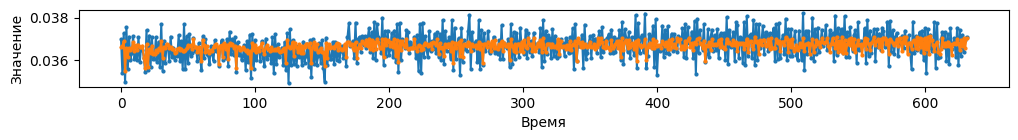

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


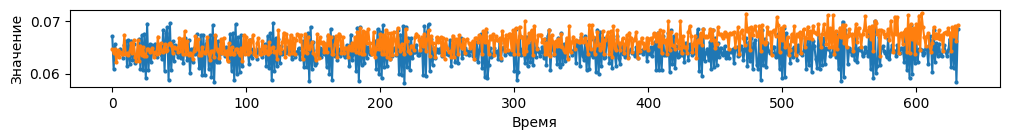

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


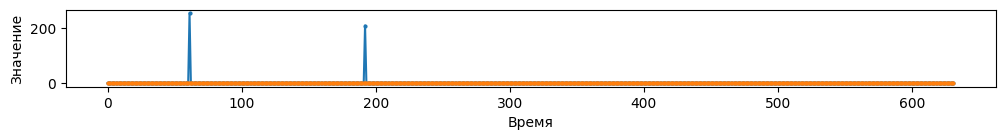

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


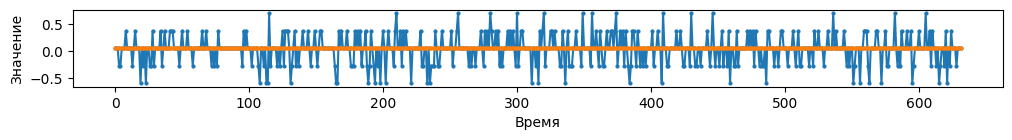

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


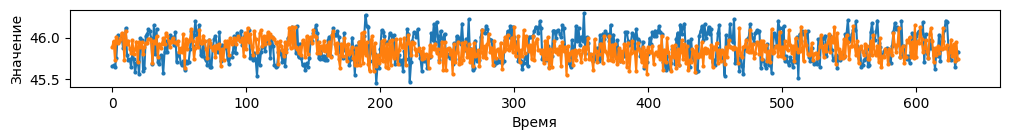

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


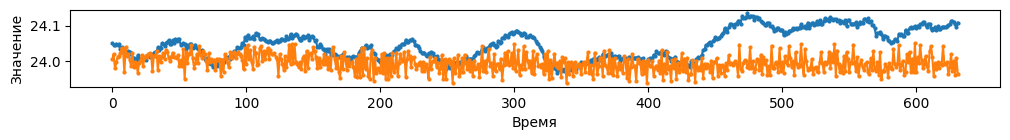

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


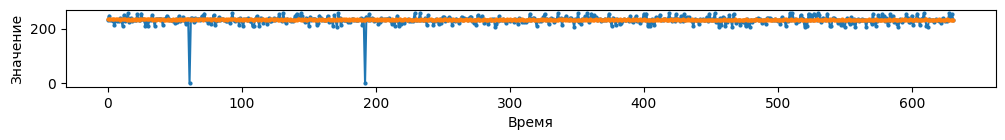

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


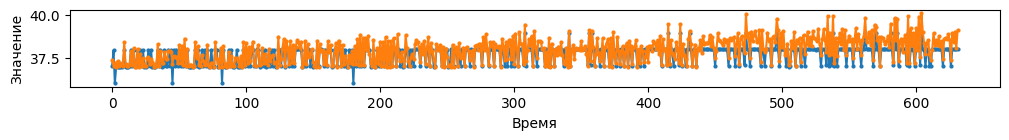

In [17]:
for i in range(val_sc.shape[1]):
    plt.figure(figsize=(12,1))
    plt.plot(StSc.inverse_transform(val_sc)[:, i], marker='o', markersize=2)
    plt.plot(StSc.inverse_transform(model.predict(val_sc))[:, i], marker='o', markersize=2)
    plt.xlabel('Время')
    plt.ylabel('Значение')
    plt.show()

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


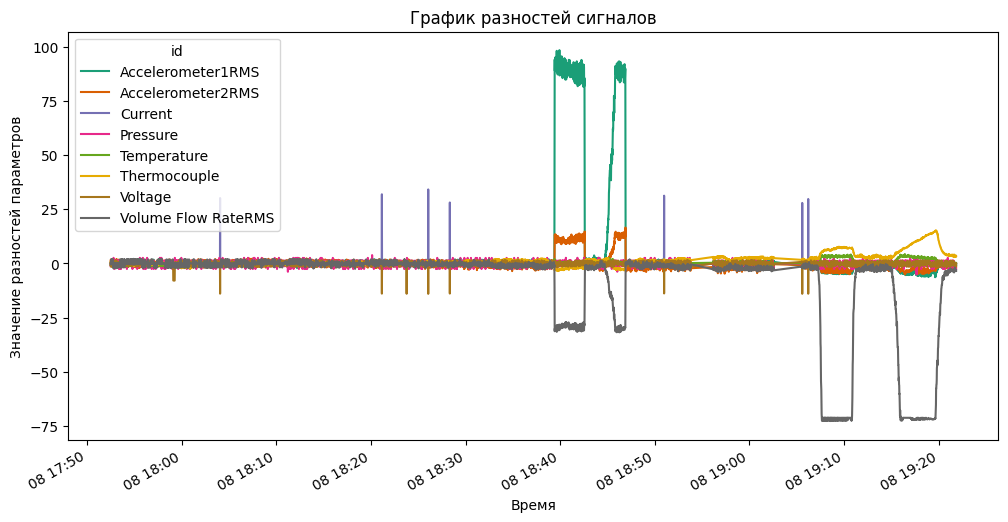

In [18]:
test_residuals = data_sc - model.predict(data_sc)

pd.DataFrame(test_residuals, columns=data.columns, index = data.index).plot(figsize=(12,6), cmap='Dark2')
plt.xlabel('Время')
plt.ylabel('Значение разностей параметров')
plt.title('График разностей сигналов')
plt.show()

In [19]:
train_residuals = train_sc - model.predict(train_sc)
val_residuals = val_sc - model.predict(val_sc)

UCL = pd.DataFrame(val_residuals).abs().sum(axis=1).quantile(0.99)

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [20]:
# можем повысить контрольный предел из-за деградации оборудования для снижения кол-ва ложных тревог
UCL = 2 * UCL

print(f'Значение контрольного предела (UCL) = {UCL.round(2)}')

Значение контрольного предела (UCL) = 18.38


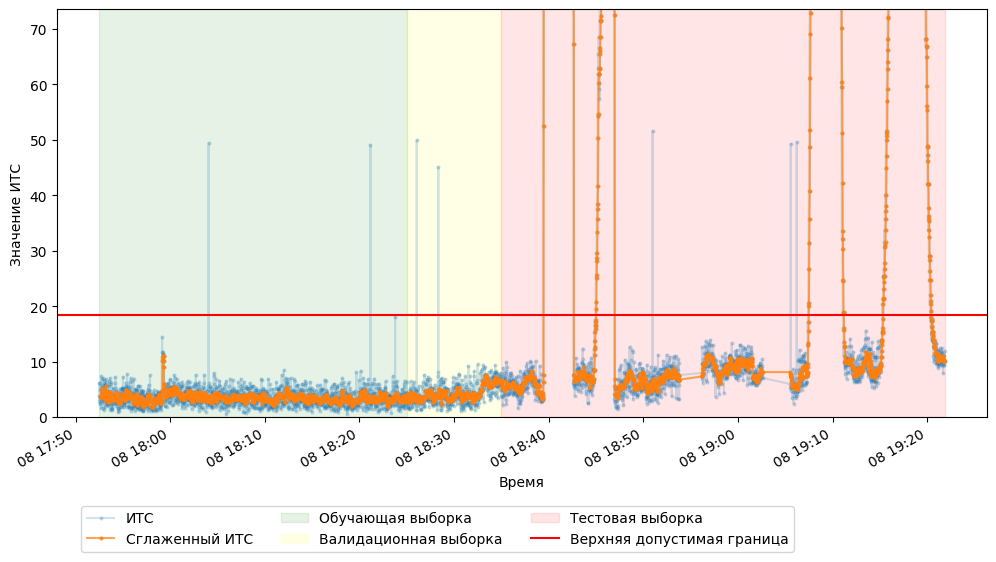

In [21]:
# ИТС
pd.DataFrame(test_residuals, index=data.index).abs().sum(axis=1).plot(marker='o', 
                                                                      markersize=2, 
                                                                      alpha=0.2, 
                                                                      figsize=(12,6), 
                                                                      label='ИТС')
# ИТС с медианным фильтром с окном в 3 точки
pd.DataFrame(test_residuals, index=data.index).abs().sum(axis=1).rolling(11).median().plot(marker='o', 
                                                                                          markersize=2, 
                                                                                          alpha=0.7, 
                                                                                          figsize=(12,6),
                                                                                          label='Сглаженный ИТС')

plt.axvspan(data.index[0], 
            '2019-07-08 18:25', 
            color='green', 
            alpha=0.1, 
            label='Обучающая выборка')

plt.axvspan('2019-07-08 18:25', 
            '2019-07-08 18:35', 
            color='yellow', 
            alpha=0.1, 
            label='Валидационная выборка')

plt.axvspan('2019-07-08 18:35', 
            data.index[-1], 
            color='red', 
            alpha=0.1, 
            label='Тестовая выборка')

plt.axhline(UCL, color='r', label='Верхняя допустимая граница')
plt.ylim([0, 4*UCL])
plt.xlabel('Время')
plt.ylabel('Значение ИТС')
plt.legend(bbox_to_anchor =(0.8, -0.2), ncol = 3)
plt.show()


In [31]:
df = pd.DataFrame(test_residuals, index=data.index).abs().sum(axis=1).to_frame()

df_reset = df.reset_index()
df_reset

,datetime,0
0,2019-07-08 17:52:29,3.900603
1,2019-07-08 17:52:30,6.129305
2,2019-07-08 17:52:31,2.992831
3,2019-07-08 17:52:32,3.804610
4,2019-07-08 17:52:33,4.976886
...,...,...
4833,2019-07-08 19:21:47,10.104681
4834,2019-07-08 19:21:48,10.294235
4835,2019-07-08 19:21:49,10.526789
4836,2019-07-08 19:21:50,11.133109


In [33]:
df_reset[df_reset[0] > UCL] # итоговый список 

,datetime,0
664,2019-07-08 18:04:03,49.351316
1645,2019-07-08 18:21:09,49.066726
1927,2019-07-08 18:26:03,49.929542
2058,2019-07-08 18:28:20,45.022071
2693,2019-07-08 18:39:24,52.395245
...,...,...
4746,2019-07-08 19:20:16,24.813090
4747,2019-07-08 19:20:17,20.345534
4748,2019-07-08 19:20:18,22.044314
4750,2019-07-08 19:20:21,20.897458


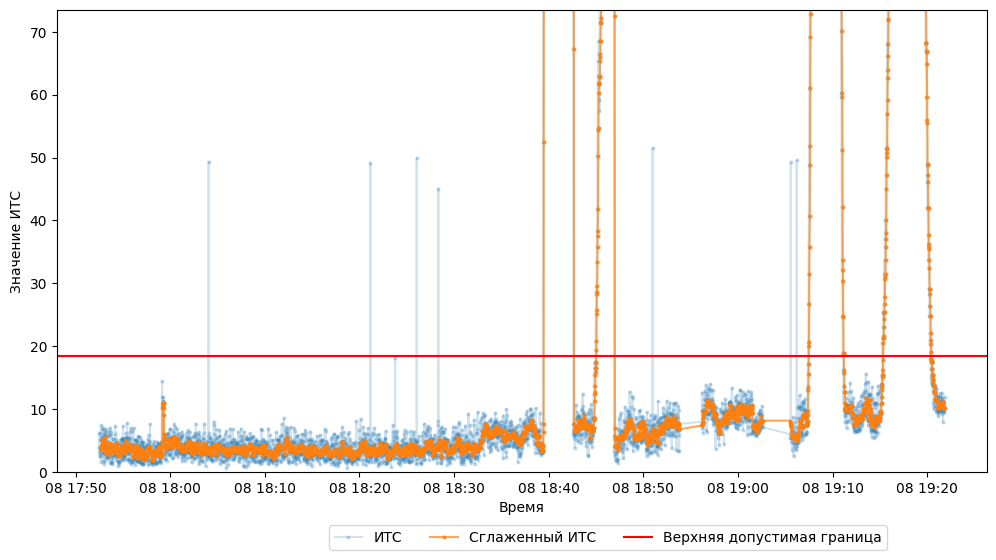

In [35]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(data.index, 
        pd.DataFrame(test_residuals).abs().sum(axis=1), 
        marker='o', 
        markersize=2, 
        alpha=0.2, 
        label='ИТС')

ax.plot(data.index, 
        pd.DataFrame(test_residuals).abs().sum(axis=1).rolling(11).median(), 
        marker='o', 
        markersize=2, 
        alpha=0.7, 
        label='Сглаженный ИТС')

ax.axhline(UCL, color='r', label='Верхняя допустимая граница')
ax.set_ylim([0, 4*UCL])
ax.set_xlabel('Время')
ax.set_ylabel('Значение ИТС')
plt.legend(bbox_to_anchor =(0.9, -0.1), ncol = 4)
plt.show()